In [109]:
import json
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
from numpy import ndarray
from pandas import DataFrame
from pathlib import Path
import seaborn as sns
from typing import Tuple

sns.set_theme()
sns.set_style("darkgrid")

In [81]:
PROJECT_DIR = Path("/home/yutanagano/Projects/tcr_embedder/")
BENCHMARKS_DIR = PROJECT_DIR/"benchmarks"

def load_stats(model_name: str, task_name: str) -> Tuple[DataFrame]:
    stats_dir = BENCHMARKS_DIR/model_name/task_name
    with open(stats_dir/"results.json", "r") as f:
        stats_dict = json.load(f)
    
    return stats_dict

In [82]:
TASK = "one_vs_rest"

sceptr_stats = load_stats("AB_SCEPTR", TASK)
sceptr_large_stats = load_stats("AB_SCEPTR_large", TASK)
sceptr_finetuned_stats = load_stats("AB_SCEPTR_finetuned", TASK)
tcrdist_stats = load_stats("tcrdist", TASK)

In [112]:
def plot_model_stats(stats: dict, classification_type: str, performance_metric: str, axes: Axes) -> None:
    axes.set_title(classification_type)
    aucs = [get_aucs(model_stats, classification_type, performance_metric) for model_stats in stats.values()]
    axes.boxplot(aucs, labels=stats.keys(), showmeans=True)
    axes.plot(range(1, len(stats)+1), aucs, "x-", alpha=0.5)

def get_aucs(stats_dict: dict, classification_type: str, performance_metric: str) -> ndarray:
    stats_for_ctype = stats_dict[classification_type]
    aucs = [stats[performance_metric] for stats in stats_for_ctype.values()]
    return np.array(aucs)

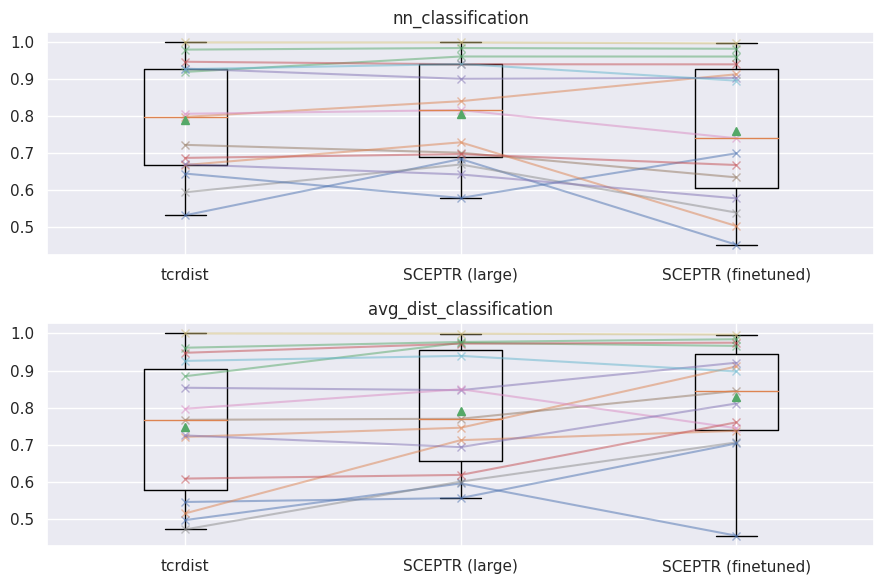

In [118]:
# nn and avg_dist, auc
stats = {
    "tcrdist": tcrdist_stats,
    # "SCEPTR": sceptr_stats,
    "SCEPTR (large)": sceptr_large_stats,
    "SCEPTR (finetuned)": sceptr_finetuned_stats
}

fig, (nn_ax, avg_dist_ax) = plt.subplots(nrows=2, ncols=1, figsize=(9,6), layout="tight")

plot_model_stats(stats, "nn_classification", "auc", nn_ax)
plot_model_stats(stats, "avg_dist_classification", "auc", avg_dist_ax)

plt.show()